# Basics:

In [154]:
import numpy as np #This is we just import without really needing it that much
import pandas as pd #For data processing, manipulation and even a bit of visualization
import matplotlib.pyplot as plt #For visualization
import seaborn as sns #For prettier visualization

In [155]:
data = pd.read_csv("../input/cleaned-ckd-dataset/CleanedKidneyDisease.csv")


In [156]:
data.head() 

,Unnamed: 0,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cells,Pus Cell Clumps,Bacteria,...,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm),Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Chronic Kidney Disease,Blood_Type
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,7800.0,5.2,yes,yes,no,good,no,no,ckd,O
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,6000.0,NaN,no,no,no,good,no,no,ckd,A
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,7500.0,NaN,no,yes,no,poor,no,yes,ckd,B
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,6700.0,3.9,yes,no,no,poor,yes,yes,ckd,O
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,7300.0,4.6,no,no,no,good,no,no,ckd,A


In [157]:
data.drop("Unnamed: 0", axis=1, inplace=True)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       391 non-null    float64
 1   Blood Pressure (mm/Hg)          388 non-null    float64
 2   Specific Gravity                353 non-null    float64
 3   Albumin                         354 non-null    float64
 4   Sugar                           351 non-null    float64
 5   Red Blood Cells                 248 non-null    object 
 6   Pus Cells                       335 non-null    object 
 7   Pus Cell Clumps                 396 non-null    object 
 8   Bacteria                        396 non-null    object 
 9   Blood Glucose Random (mgs/dL)   356 non-null    float64
 10  Blood Urea (mgs/dL)             381 non-null    float64
 11  Serum Creatinine (mgs/dL)       383 non-null    float64
 12  Sodium (mEq/L)                  313 

In [159]:
data.columns

Index(['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin',
       'Sugar', 'Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria',
       'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)',
       'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)',
       'Hemoglobin (gms)', 'Packed Cell Volume',
       'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)',
       'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease',
       'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease',
       'Blood_Type'],
      dtype='object')

In [160]:
#for col in data.columns:
 #   print(f"\n\nUnique Values in {col}:")
  #  print(data[col].value_counts())

In [161]:
for i in range(data.shape[0]):
    if data.loc[i, "Diabetes Mellitus"]==' yes':
        data.loc[i, "Diabetes Mellitus"]='yes'
        break

In [162]:
data.shape

(400, 26)

Missing values handling:

In [163]:
data.isna().sum()

Age (yrs)                           9
Blood Pressure (mm/Hg)             12
Specific Gravity                   47
Albumin                            46
Sugar                              49
Red Blood Cells                   152
Pus Cells                          65
Pus Cell Clumps                     4
Bacteria                            4
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Sodium (mEq/L)                     87
Potassium (mEq/L)                  88
Hemoglobin (gms)                   52
Packed Cell Volume                 71
White Blood Cells (cells/cmm)     106
Red Blood Cells (millions/cmm)    131
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
Blood_Type                          0
dtype: int64

You can sort values in ascending or descending order:

In [164]:
missing=data.isna().sum().sort_values(ascending=False)
print(missing)

Red Blood Cells                   152
Red Blood Cells (millions/cmm)    131
White Blood Cells (cells/cmm)     106
Potassium (mEq/L)                  88
Sodium (mEq/L)                     87
Packed Cell Volume                 71
Pus Cells                          65
Hemoglobin (gms)                   52
Sugar                              49
Specific Gravity                   47
Albumin                            46
Blood Glucose Random (mgs/dL)      44
Blood Urea (mgs/dL)                19
Serum Creatinine (mgs/dL)          17
Blood Pressure (mm/Hg)             12
Age (yrs)                           9
Bacteria                            4
Pus Cell Clumps                     4
Hypertension                        2
Diabetes Mellitus                   2
Coronary Artery Disease             2
Appetite                            1
Pedal Edema                         1
Anemia                              1
Chronic Kidney Disease              0
Blood_Type                          0
dtype: int64

Before doing any graphs, let's pick a style for our visualizations.

In [165]:
from matplotlib import style

In [166]:
style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [167]:
style.use("fivethirtyeight")

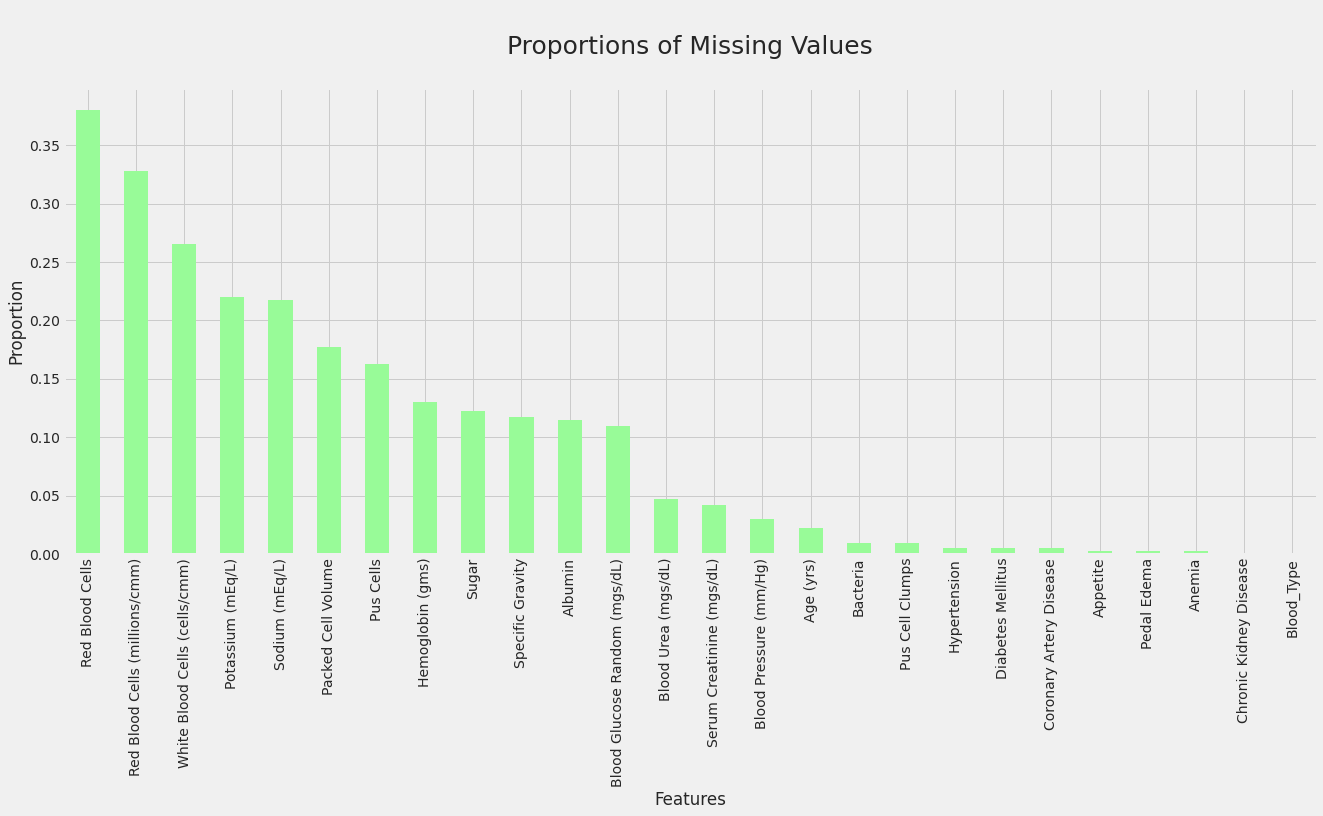

In [168]:
plt.figure(figsize=(20,8))
(missing/400).plot(kind="bar", color="palegreen") #400 is the number of patients/rows/examples/observations/lines in our data
#The "missing" variable contains the numbers of missing values, so we divide by 400 to get the proportions.
plt.title('\nProportions of Missing Values\n', fontsize=25)
plt.ylabel("Proportion")
plt.xlabel("Features")
plt.show()

In [169]:
data.dropna().shape

(158, 26)

More than 35% of the values of the "Red Blood Cells" feature are missing.

# Univariate Analysis
Which basically means we will look at each feature by itself, without analyzing the relationships it has with other features.

### Continuous Features

Let's take a look at the "Age (yrs)" feature/variable/column

<AxesSubplot:xlabel='Age (yrs)', ylabel='Count'>

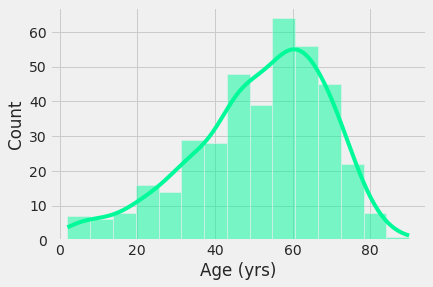

In [170]:
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen")
# kde=True means "show me a curve (courbe) with the histogram"

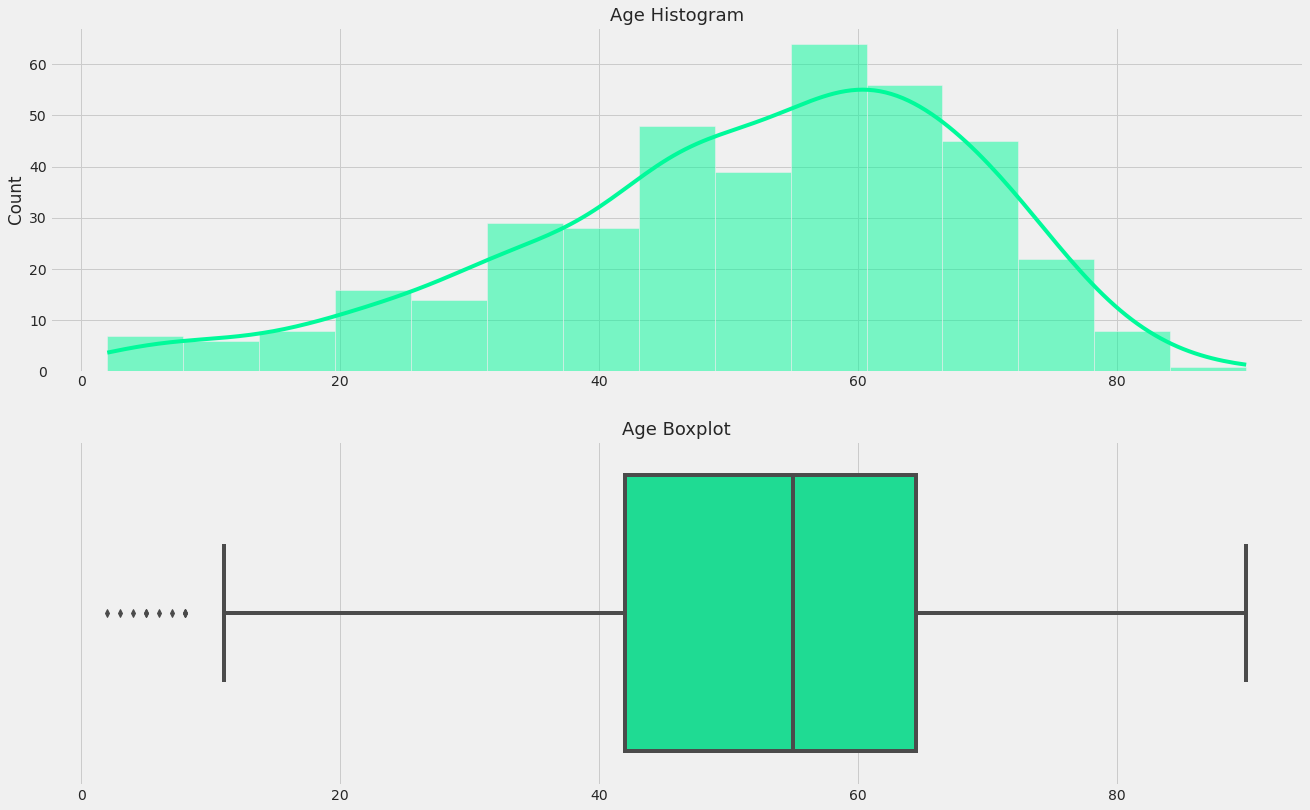

In [171]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=data, x="Age (yrs)", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("Age Histogram", fontsize=18)
axes[1].set_title("Age Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

The boxplot shows us outliers, which are points that very far away the other points.

In [172]:
data["Age (yrs)"].mode()

0    60.0
dtype: float64

In [173]:
data["Age (yrs)"].mean()

51.48337595907928

In [174]:
data["Age (yrs)"].median()

55.0

The mean is less than the median here because the mean is affected by outliers while the median isn't.

In [175]:
data["Age (yrs)"].quantile(q=0.25)

42.0

In [176]:
data["Age (yrs)"].describe()

count    391.000000
mean      51.483376
std       17.169714
min        2.000000
25%       42.000000
50%       55.000000
75%       64.500000
max       90.000000
Name: Age (yrs), dtype: float64

To deal with the missing values, we'll use the imputation method(fill the missing values with the mean of the column).

In [177]:
data["Age (yrs)"].fillna(data["Age (yrs)"].mean(), inplace=True)

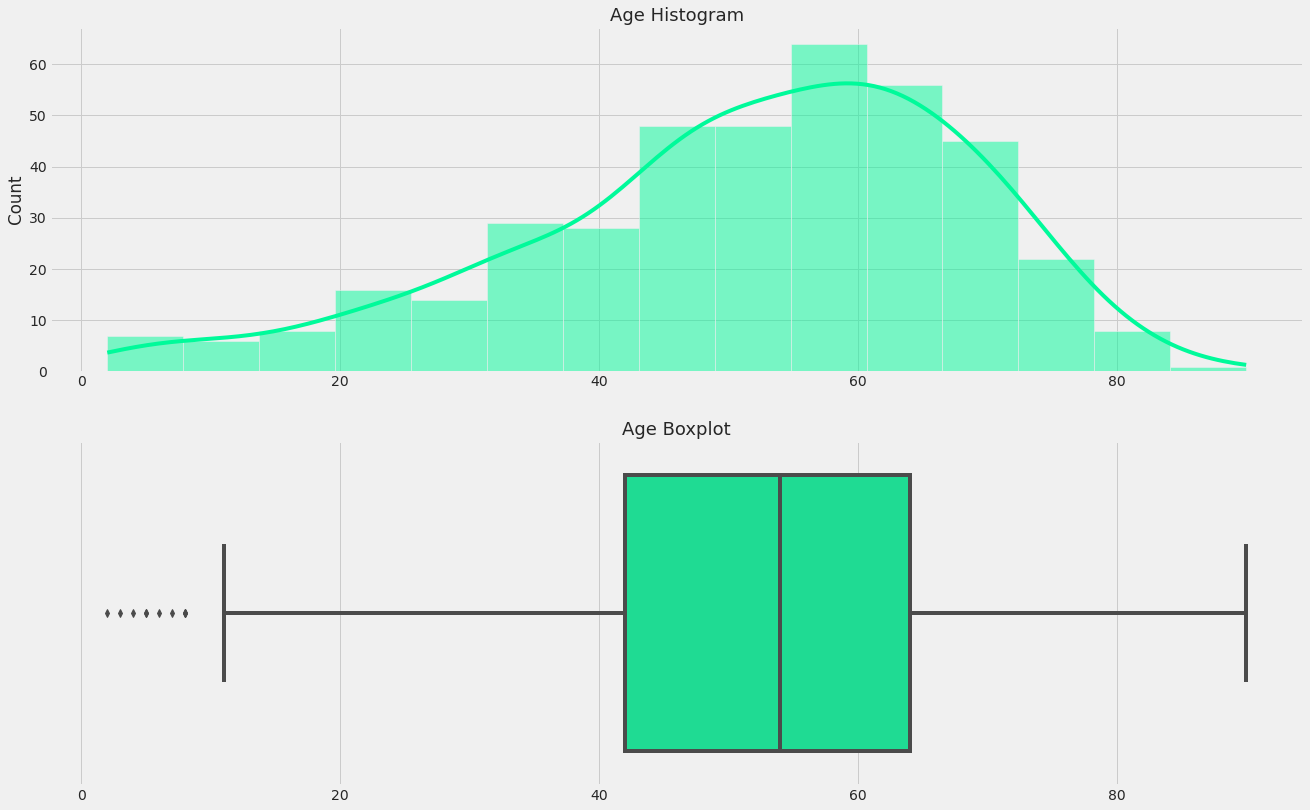

In [178]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Age (yrs)", kde=True, color="mediumspringgreen", ax=axes[0])
sns.boxplot(data=data, x="Age (yrs)", color="mediumspringgreen", ax=axes[1])
axes[0].set_title("Age Histogram", fontsize=18)
axes[1].set_title("Age Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

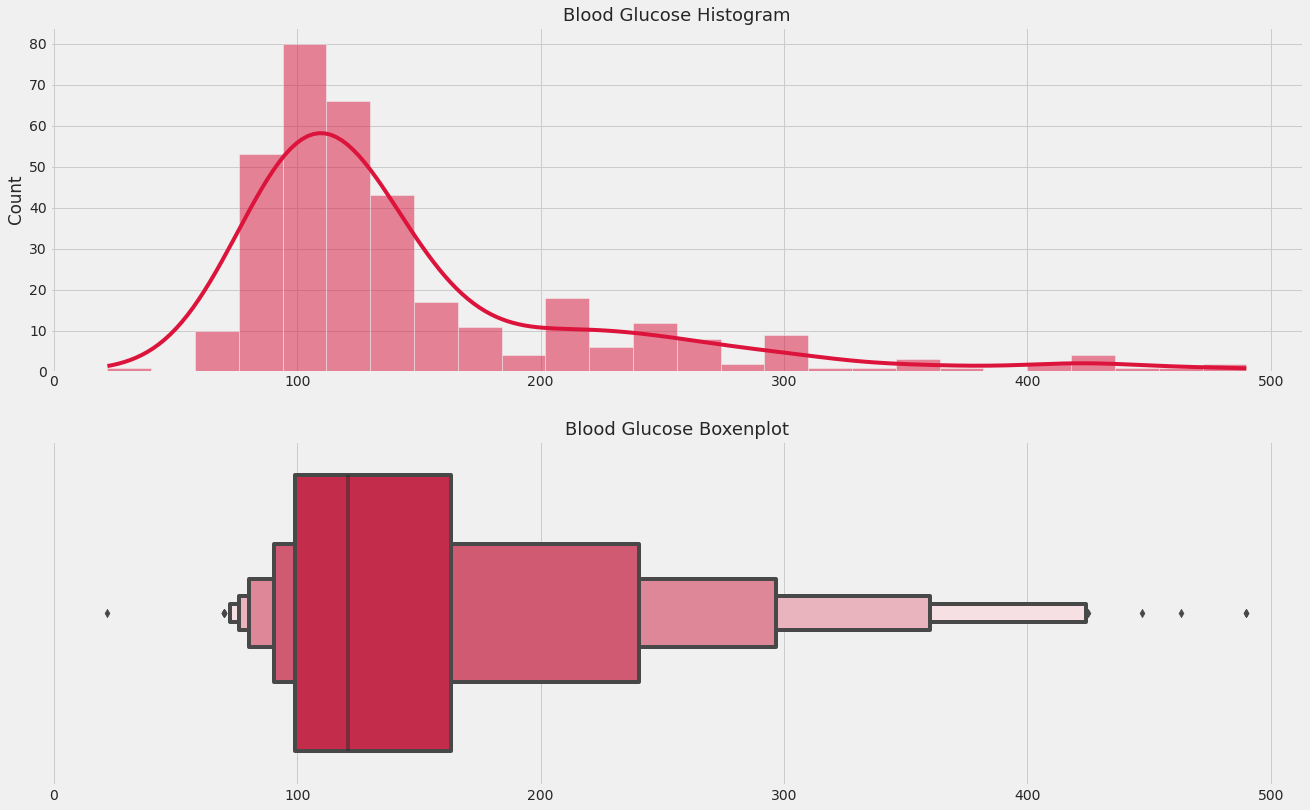

In [179]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,13))
sns.histplot(data=data, x="Blood Glucose Random (mgs/dL)", kde=True, color="crimson", ax=axes[0])
sns.boxenplot(data=data, x="Blood Glucose Random (mgs/dL)", color="crimson", ax=axes[1])
axes[0].set_title("Blood Glucose Histogram", fontsize=18)
axes[1].set_title("Blood Glucose Boxenplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

The histogram above is kind of pulled towards the right. We say the distribution is **skewed** .   
Boxenplots show less outliers than boxplots.

In [180]:
data["Blood Glucose Random (mgs/dL)"].mean()

148.0365168539326

In [181]:
data["Blood Glucose Random (mgs/dL)"].median()

121.0

The mean and the median are very far apart. This is because the distribution is skewed and has lots of outliers.

In [182]:
data["Blood Glucose Random (mgs/dL)"].mode()

0    99.0
dtype: float64

In [183]:
data["Blood Glucose Random (mgs/dL)"].fillna(data["Blood Glucose Random (mgs/dL)"].mode(), inplace=True)

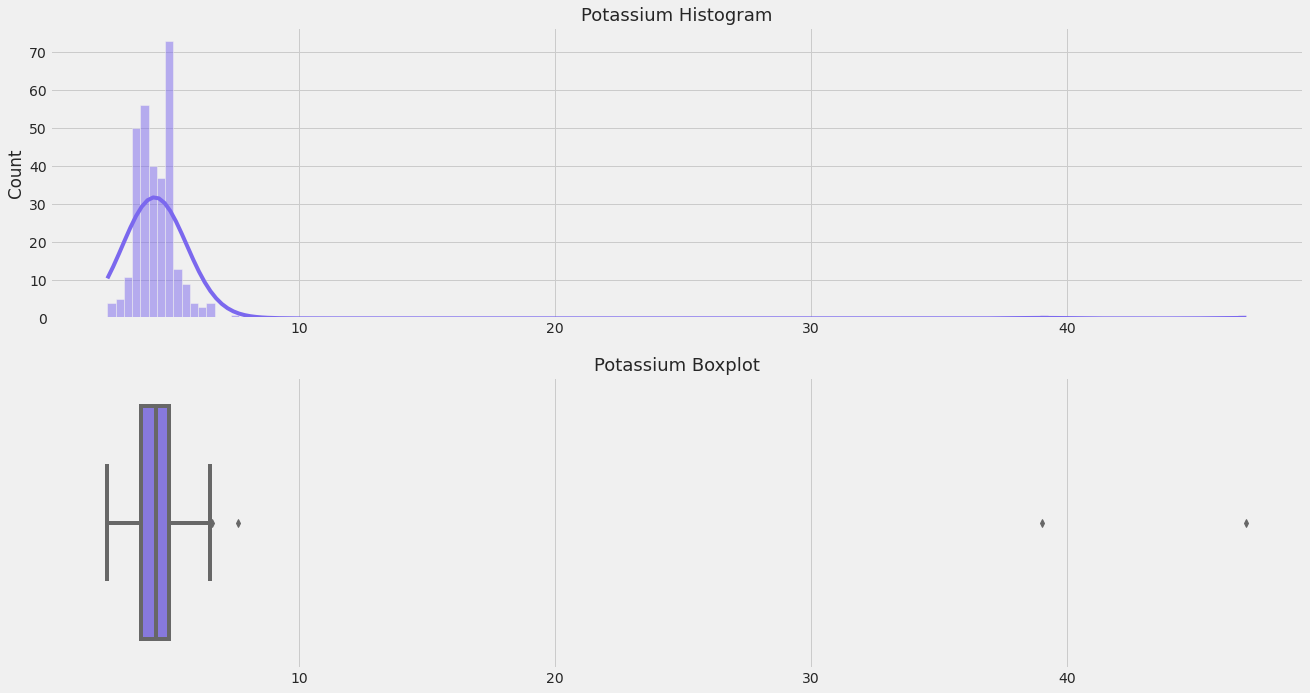

In [184]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,11))
sns.histplot(data=data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue", ax=axes[0])
sns.boxplot(data=data, x="Potassium (mEq/L)", color="mediumslateblue", ax=axes[1])
axes[0].set_title("Potassium Histogram", fontsize=18)
axes[1].set_title("Potassium Boxplot", fontsize=18)
axes[0].set_xlabel(None)
axes[1].set_xlabel(None)
plt.show()

In [185]:
data["Potassium (mEq/L)"].mean()

4.627243589743592

In [186]:
data["Potassium (mEq/L)"].median()

4.4

Despite the outliers, the mean and the median are almost the same.  
This is because the number of outliers is very small.  
**The effect of outliers increases with their number and their distance from the center of the distribution.**

In [187]:
data["Potassium (mEq/L)"].mode()

0    3.5
1    5.0
dtype: float64

Note that we have two modes here.  
This is because the values 3.5 and 5.0 are repeated the same number of times.  
The following cell shows us how to get each mode:

In [188]:
print(data["Potassium (mEq/L)"].mode()[0])
print(data["Potassium (mEq/L)"].mode()[1])

3.5
5.0


The following instruction shows us some descriptive statistics about all continuous features.

In [189]:
data.describe()

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
count,400.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,16.974966,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


### Categorical Features

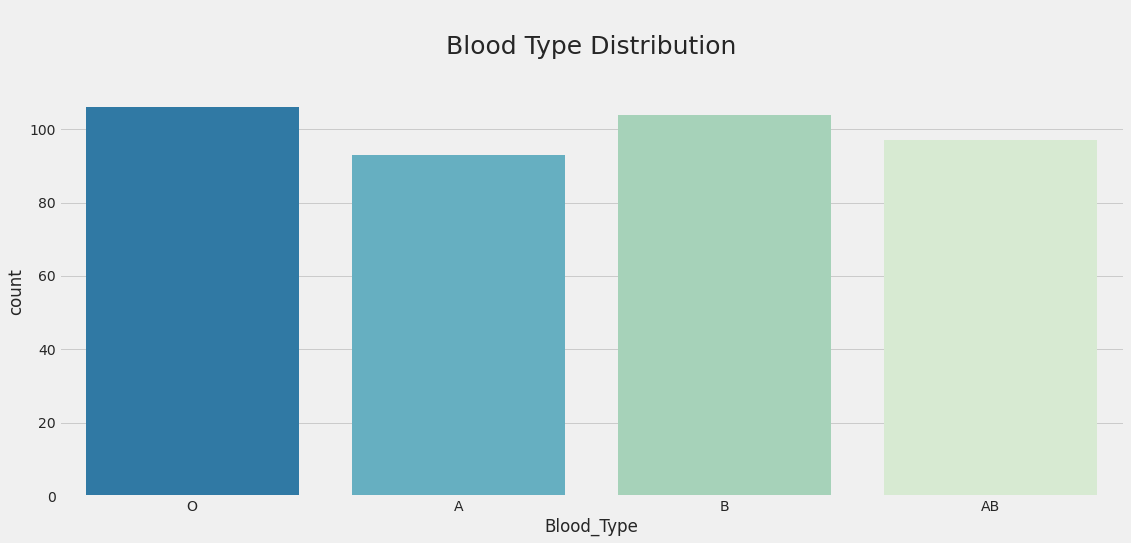

In [190]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Blood_Type", palette='GnBu_r')
plt.title("\nBlood Type Distribution\n", fontsize=25)
plt.show()

We have more than 100 patients with blood type O and about 92 patients with blood type A

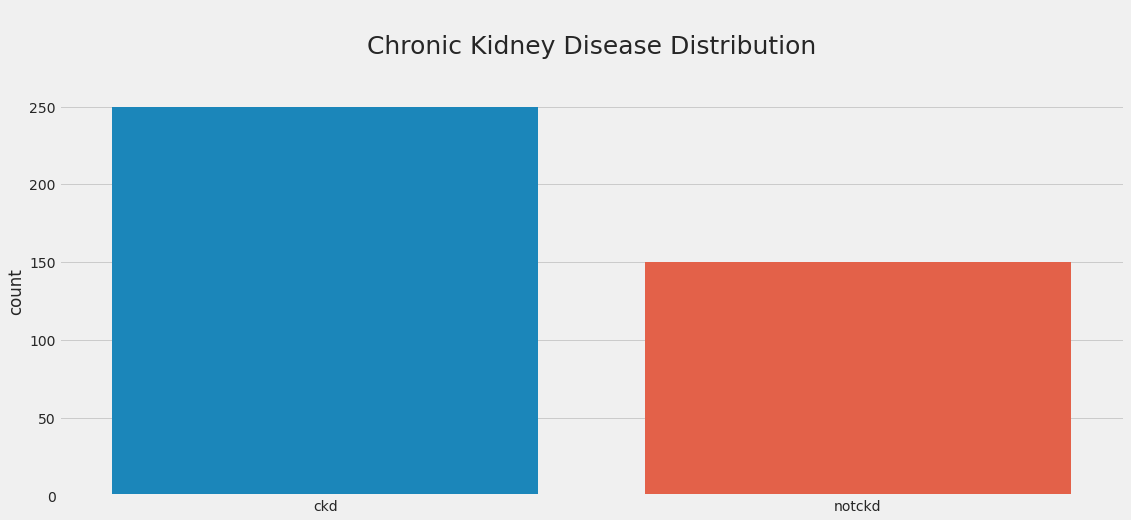

In [191]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Chronic Kidney Disease")
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=25)
plt.xlabel(None) 
plt.show()

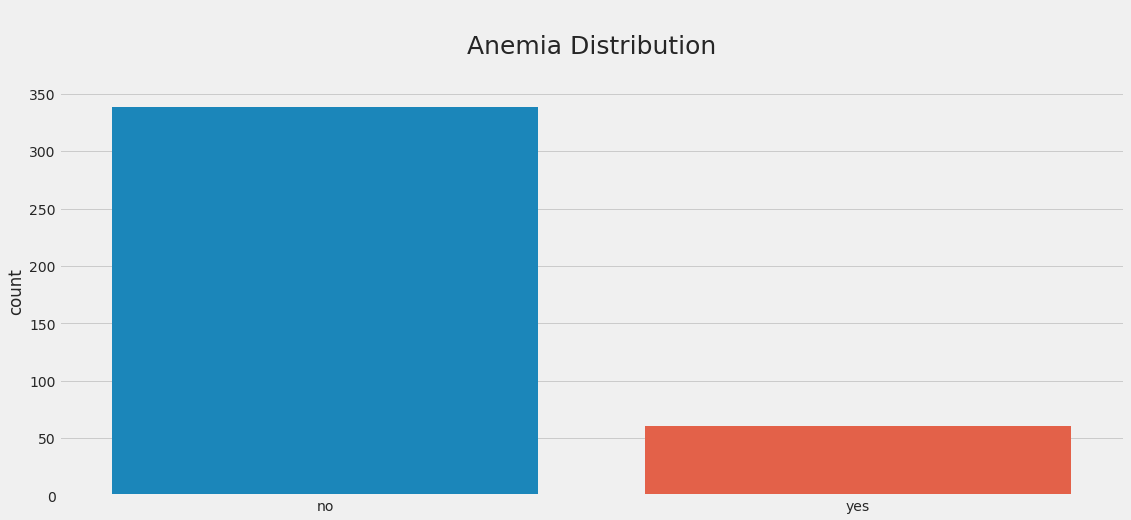

In [192]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Anemia")
plt.title("\nAnemia Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

This one is very imbalanced.

In [193]:
data['Anemia'].mode()

0    no
dtype: object

You can see the imbalance in the output of the value_counts() command:

In [194]:
data["Anemia"].value_counts()

no     339
yes     60
Name: Anemia, dtype: int64

**RBC OUTLIER ANALYSIS AND PROCESSING**

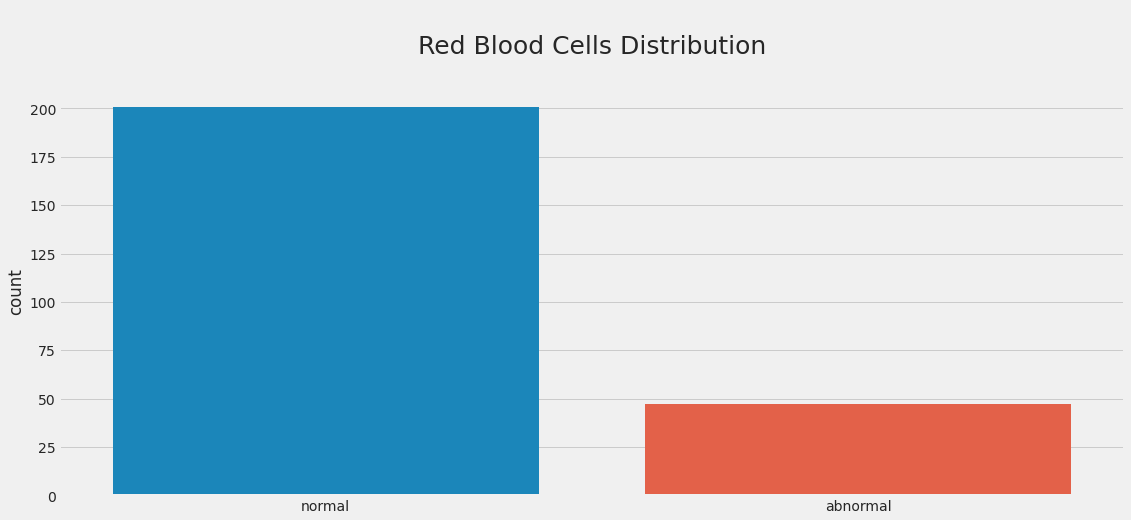

In [195]:
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Red Blood Cells")
plt.title("\nRed Blood Cells Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

This one is also very imbalanced

In [196]:
data["Red Blood Cells"].mode()

0    normal
dtype: object

Outliers are treated using imputation method (replace the missing values with the mode).

In [197]:
data["Red Blood Cells"].fillna(data["Red Blood Cells"].mode()[0], inplace=True)

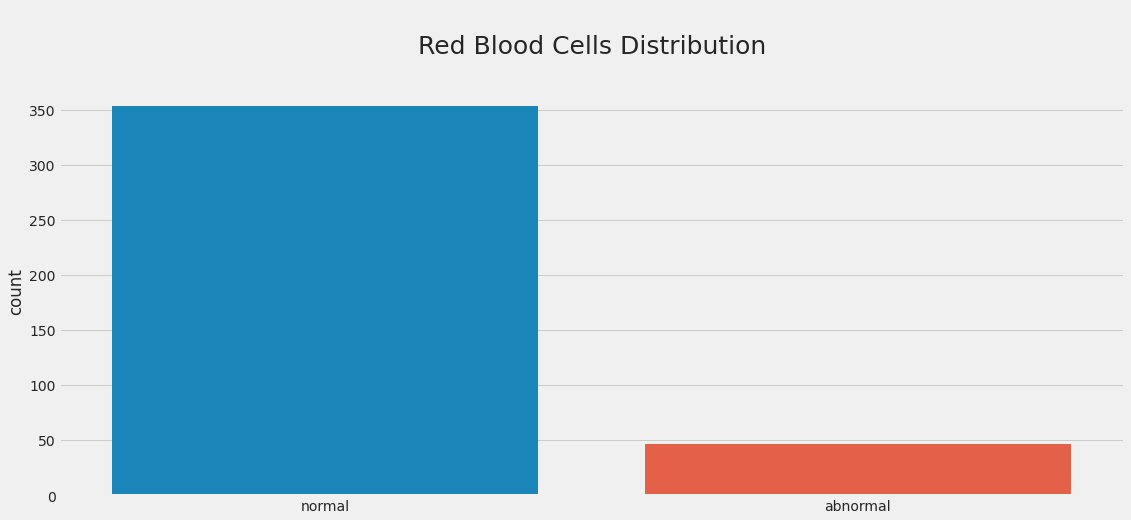

In [198]:
#post imputation processing
plt.figure(figsize=(17,7))
sns.countplot(data=data, x="Red Blood Cells")
plt.title("\nRed Blood Cells Distribution\n", fontsize=25)
plt.xlabel(None)
plt.show()

Imbalanced data is a problem, especially if the target feature is very imbalanced.

Now let's see how we can fill the missing values of all features with a for loop instead of doing it one by one.

First, we create a list for the numerical features and another for the categorical features.

In [199]:
numerical=[]
for col in data.columns:
    if data[col].dtype=="float64":
        numerical.append(col)
print(numerical)

['Age (yrs)', 'Blood Pressure (mm/Hg)', 'Specific Gravity', 'Albumin', 'Sugar', 'Blood Glucose Random (mgs/dL)', 'Blood Urea (mgs/dL)', 'Serum Creatinine (mgs/dL)', 'Sodium (mEq/L)', 'Potassium (mEq/L)', 'Hemoglobin (gms)', 'Packed Cell Volume', 'White Blood Cells (cells/cmm)', 'Red Blood Cells (millions/cmm)']


In [200]:
categorical=[]
for col in data.columns:
    if data[col].dtype=="object":
        categorical.append(col)
print(categorical)

['Red Blood Cells', 'Pus Cells', 'Pus Cell Clumps', 'Bacteria', 'Hypertension', 'Diabetes Mellitus', 'Coronary Artery Disease', 'Appetite', 'Pedal Edema', 'Anemia', 'Chronic Kidney Disease', 'Blood_Type']


In [201]:
for col in data.columns:
    if col in numerical:
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age (yrs)                       400 non-null    float64
 1   Blood Pressure (mm/Hg)          400 non-null    float64
 2   Specific Gravity                400 non-null    float64
 3   Albumin                         400 non-null    float64
 4   Sugar                           400 non-null    float64
 5   Red Blood Cells                 400 non-null    object 
 6   Pus Cells                       400 non-null    object 
 7   Pus Cell Clumps                 400 non-null    object 
 8   Bacteria                        400 non-null    object 
 9   Blood Glucose Random (mgs/dL)   400 non-null    float64
 10  Blood Urea (mgs/dL)             400 non-null    float64
 11  Serum Creatinine (mgs/dL)       400 non-null    float64
 12  Sodium (mEq/L)                  400 

As we can see there are no missing values anymore.

# Bivariate Analysis
Which basically means we'll analyse features two by two and search for relationships/dependencies between them.

In [215]:
style.use("seaborn-darkgrid")

**Relation between two continuous attributes using scatterplots**

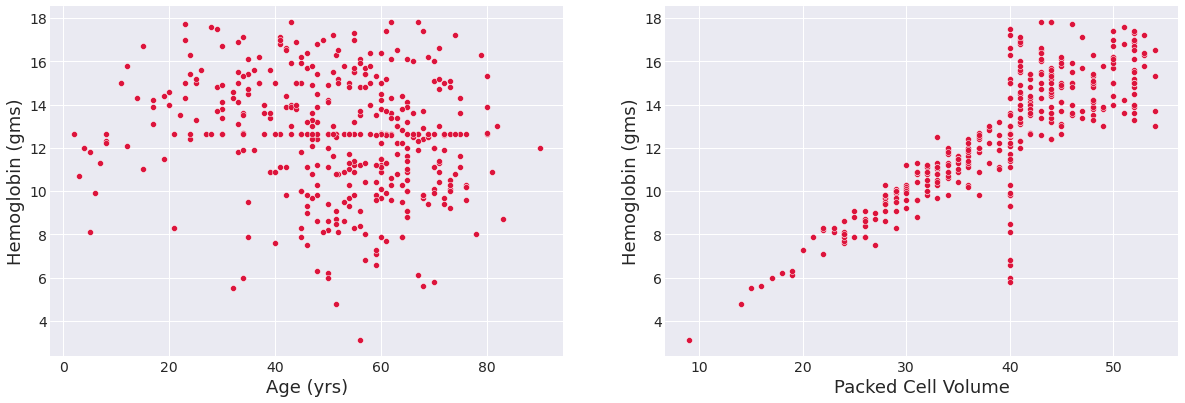

In [216]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(18,6))

sns.scatterplot(data=data, x="Age (yrs)", y="Hemoglobin (gms)", color="crimson", ax=axes[0])

axes[0].set_xlabel(axes[0].get_xlabel(), fontsize=18)
axes[0].set_ylabel(axes[0].get_ylabel(), fontsize=18)

sns.scatterplot(data=data, x="Packed Cell Volume", y="Hemoglobin (gms)", color='crimson', ax=axes[1])

axes[1].set_xlabel(axes[1].get_xlabel(), fontsize=18)
axes[1].set_ylabel(axes[1].get_ylabel(), fontsize=18)

plt.show()

#### The Correlation Matrix:

In [217]:
correlation_matrix = mydata[numerical].corr()
correlation_matrix

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),Hemoglobin (gms),Packed Cell Volume,White Blood Cells (cells/cmm),Red Blood Cells (millions/cmm)
Age (yrs),1.000000,0.136734,-0.159073,0.084416,0.187615,0.230858,0.192809,0.133438,-0.085760,0.049753,-0.175166,-0.210241,0.094021,-0.202592
Blood Pressure (mm/Hg),0.136734,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303,-0.289237,0.022177,-0.219317
Specific Gravity,-0.159073,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699,0.496434,-0.195068,0.432222
Albumin,0.084416,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399,-0.473446,0.202920,-0.405092
Sugar,0.187615,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807,-0.181285,0.156649,-0.161994
Blood Glucose Random (mgs/dL),0.230858,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435,-0.258200,0.119881,-0.214094
Blood Urea (mgs/dL),0.192809,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635,-0.523091,0.038362,-0.465243
Serum Creatinine (mgs/dL),0.133438,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492,-0.338611,-0.010333,-0.321737
Sodium (mEq/L),-0.085760,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483,0.343555,0.008010,0.313929
Potassium (mEq/L),0.049753,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428,-0.117795,-0.075563,-0.118226


We can use the heatmap function in seaborn to color our values in a way that highlights important values (close to 1 or -1)

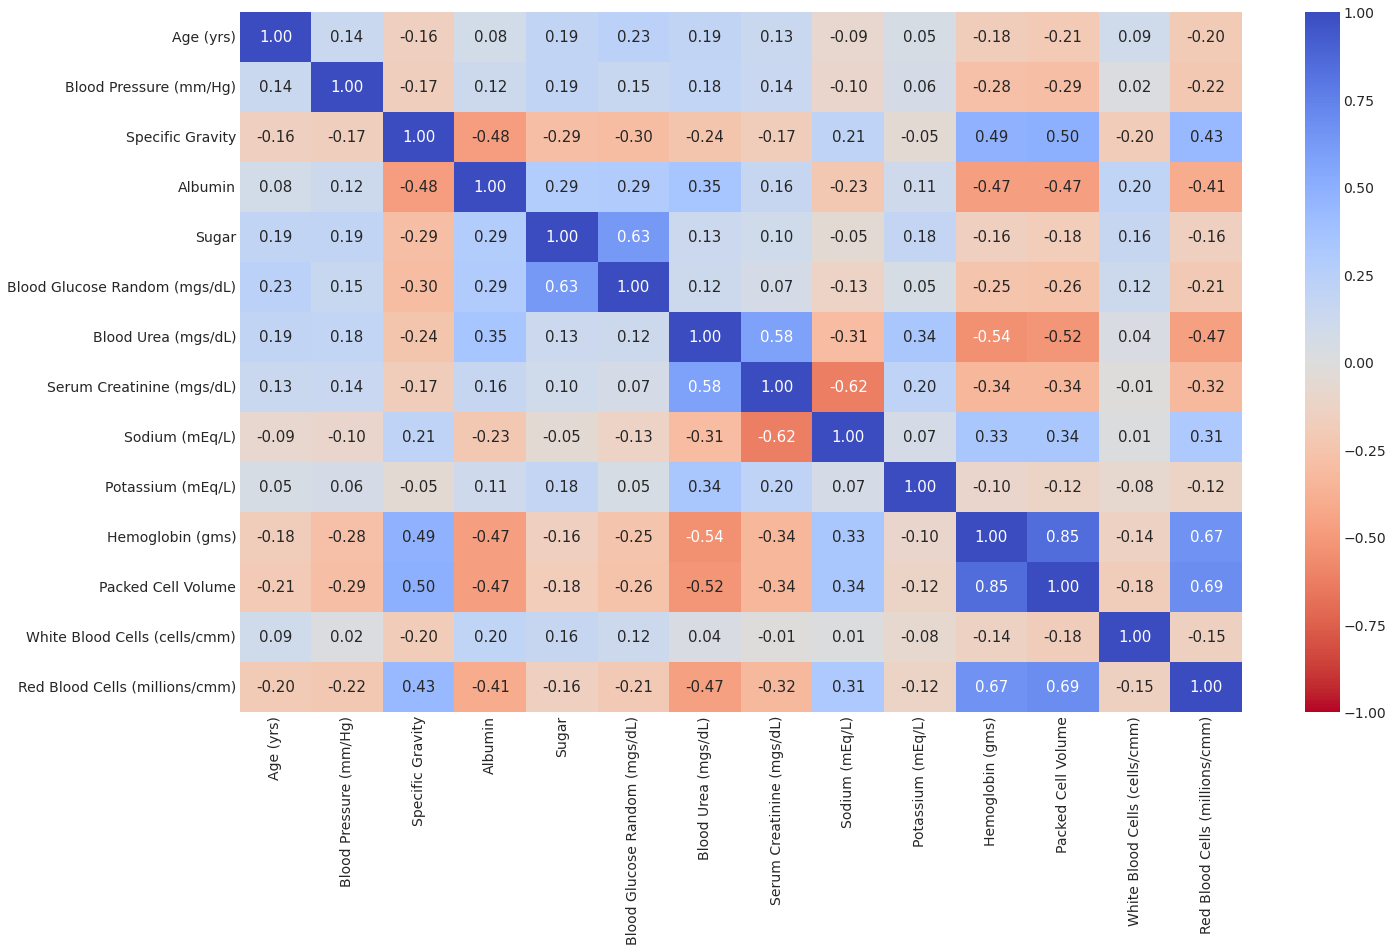

In [218]:
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, cmap="coolwarm_r",annot_kws={'fontsize':15}, fmt=".2f", annot=True, vmin=-1, vmax=1)
plt.show()

**Relation between two categorical attributes using cross tabulation and heatmap**

In [219]:
categorical

['Red Blood Cells',
 'Pus Cells',
 'Pus Cell Clumps',
 'Bacteria',
 'Hypertension',
 'Diabetes Mellitus',
 'Coronary Artery Disease',
 'Appetite',
 'Pedal Edema',
 'Anemia',
 'Chronic Kidney Disease',
 'Blood_Type']

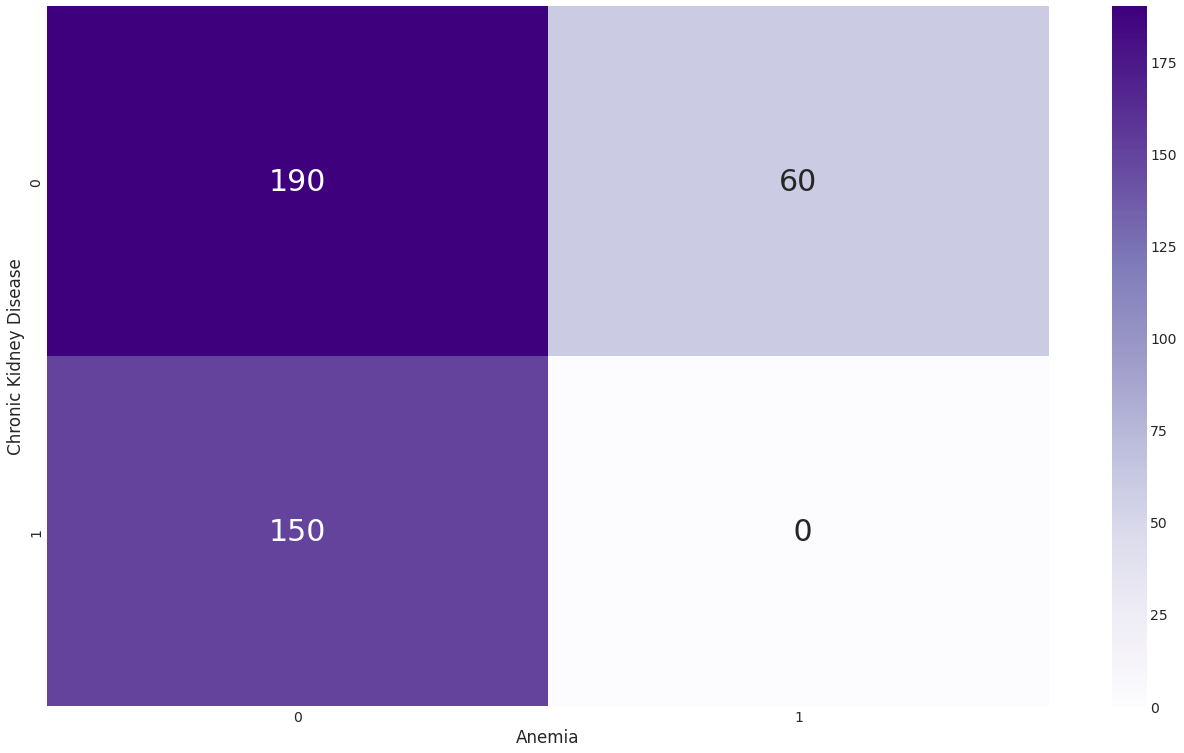

In [220]:
plt.figure(figsize=(20,12))
sns.heatmap(pd.crosstab(data["Chronic Kidney Disease"], data['Anemia']), cmap="Purples", annot=True, annot_kws={"fontsize":30}, fmt='2')
plt.show()

**Relation between a ctaegorical and a continuous attribute**

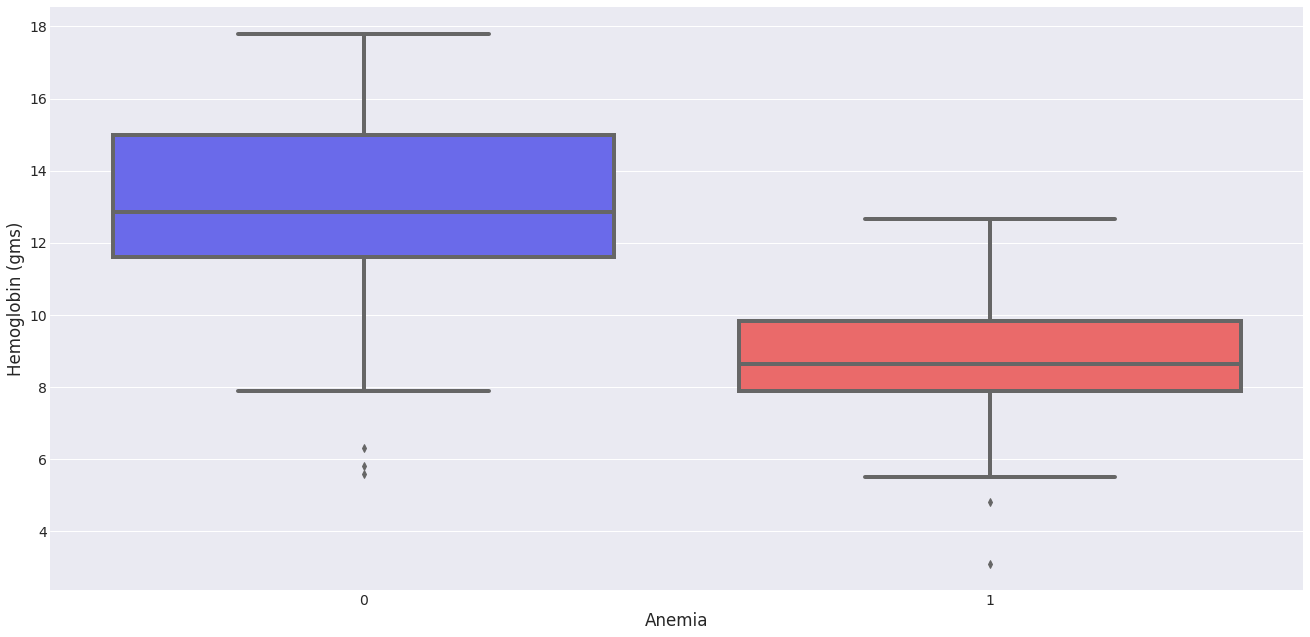

In [221]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, x="Anemia", y="Hemoglobin (gms)", palette='seismic')
plt.show()

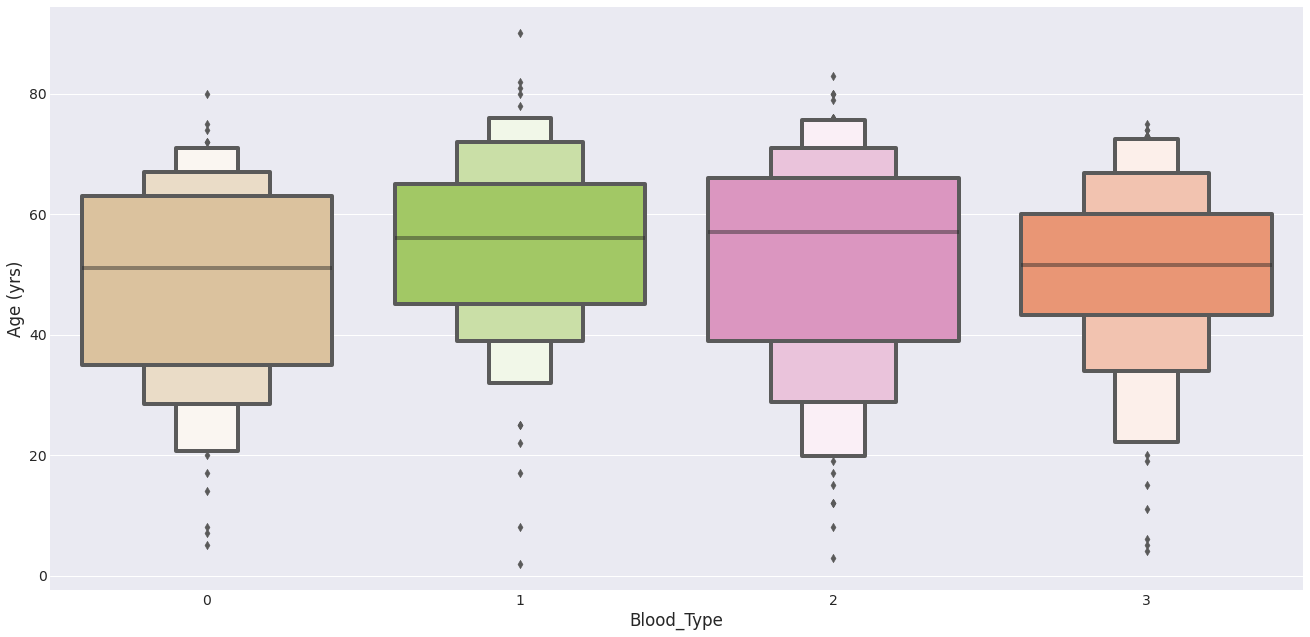

In [222]:
plt.figure(figsize=(20,10))
sns.boxenplot(data=data, x="Blood_Type", y="Age (yrs)", palette='Set2_r')
plt.show()

# Multivariate Analysis
Relationships between multiple features

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=data, x='Hemoglobin (gms)', y="Packed Cell Volume", hue="Chronic Kidney Disease")
plt.show()

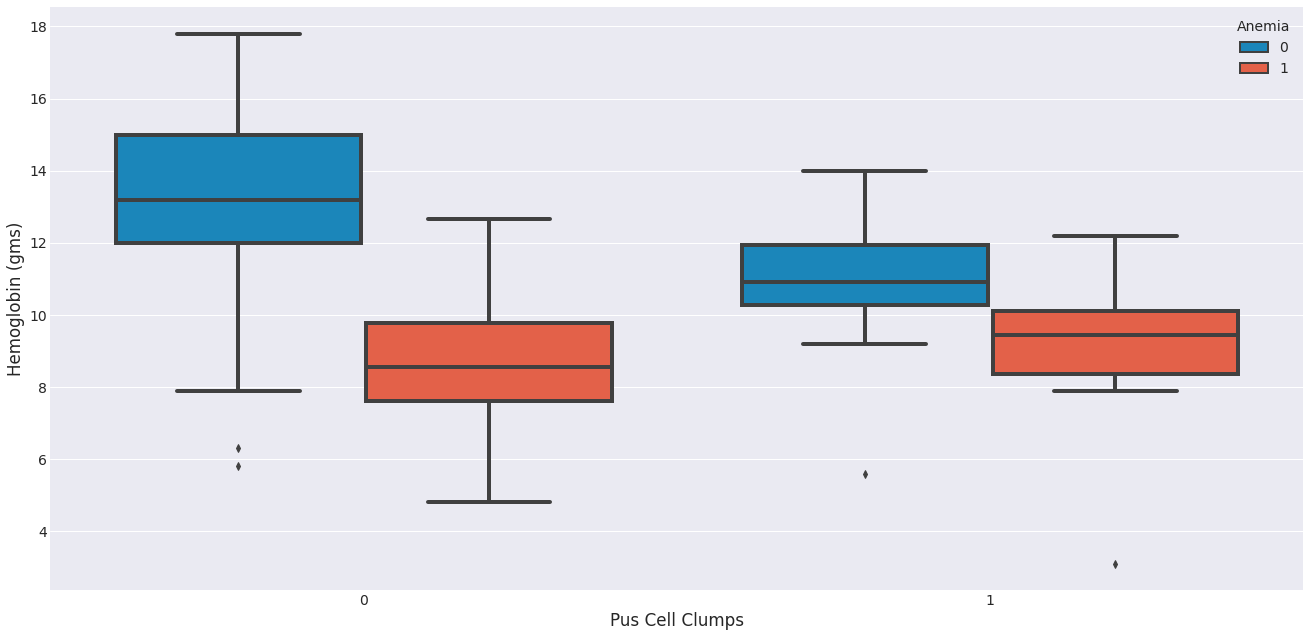

In [223]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data, y='Hemoglobin (gms)', x="Pus Cell Clumps", hue="Anemia")
plt.show()

# Feature Scaling

Scaling means that we put features on the "same scale".  
The scale of a feature is -kind of- how big are its values.  
Here's an example:  
The Age values are -approximately- between 0 and 80, while the values of the "Serum Creatinine (mgs/dL)" feature are mostly between 0 and 15.  
"White Blood Cells (cells/cmm)" has values in thousands.  
We say that "White Blood Cells (cells/cmm)" has the biggest scale, followed by Age, followed by "Serum Creatinine (mgs/dL)".  
Scaling means we make their values similar.  
Scaling is only applied to continuous and ordinal features.
##### But Why?  
Some machine learning models, especially ones that rely on distances between datapoints, require this.  
You'll understand this better when you learn about distance-based models such as KNN and KMeans.  
Scaling has other uses two, but compatibility with distance-based models is probably the most important one.

##### But How?  
There are many ways to do this, and we'll see 3 of them.  

In [224]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

#### Min-Max Scaling:
We constrain all features between 0 and 1.  
Minimum Age becomes 0, maximum Age (which is 80 for example) becomes 1.  
Minimum "White Blood Cells (cells/cmm)" becomes 0, maximum "White Blood Cells (cells/cmm)" becomes 1.  
And so on.  
We do this by substracting the minimum and dividing by the maximum.

In [226]:
scaler = MinMaxScaler()
arr = scaler.fit_transform(mydata)
mm_scaled_data = pd.DataFrame(arr, columns=mydata.columns)
mm_scaled_data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Hypertension_yes,Diabetes Mellitus_yes,Coronary Artery Disease_yes,Appetite_poor,Pedal Edema_yes,Anemia_yes,Chronic Kidney Disease_notckd,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,0.522727,0.230769,0.75,0.2,0.0,0.211538,0.088575,0.010582,0.842271,0.042697,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.056818,0.000000,0.75,0.8,0.0,0.211538,0.042362,0.005291,0.842271,0.042697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.681818,0.230769,0.25,0.4,0.6,0.856838,0.132221,0.018519,0.842271,0.042697,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.522727,0.153846,0.00,0.8,0.0,0.202991,0.139923,0.044974,0.671924,0.000000,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.556818,0.230769,0.25,0.4,0.0,0.179487,0.062901,0.013228,0.842271,0.042697,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.602273,0.230769,0.75,0.0,0.0,0.252137,0.121951,0.001323,0.917981,0.053933,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
396,0.454545,0.153846,1.00,0.0,0.0,0.113248,0.075738,0.010582,0.861199,0.022472,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
397,0.113636,0.230769,0.75,0.0,0.0,0.166667,0.062901,0.002646,0.835962,0.042697,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
398,0.170455,0.076923,1.00,0.0,0.0,0.196581,0.124519,0.007937,0.823344,0.053933,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


As you can see, all continuous features have values between 0 and 1 now.

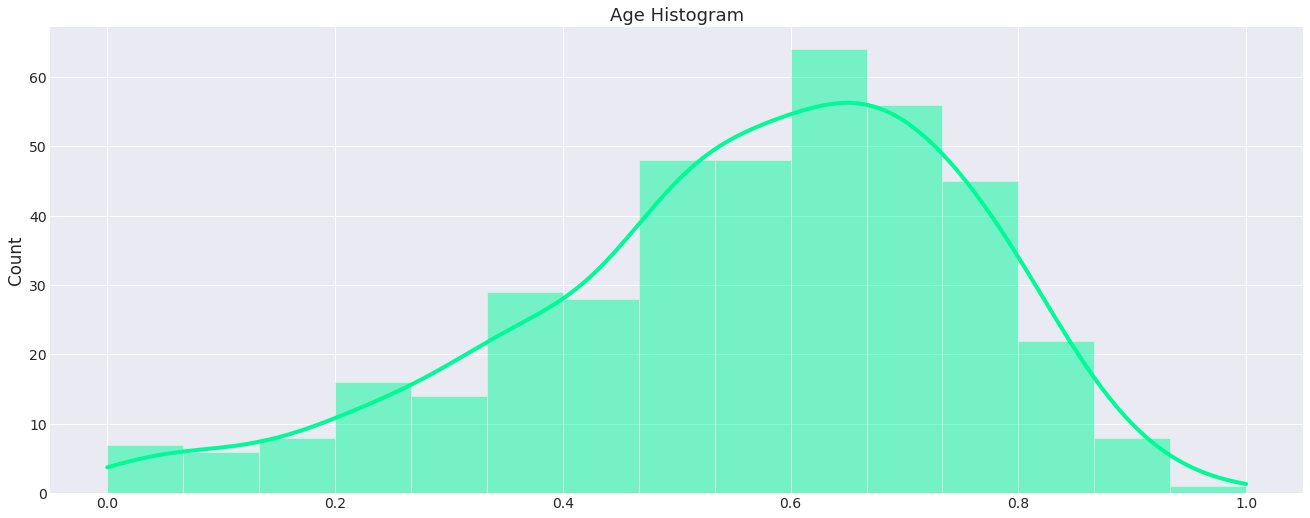

In [227]:
plt.figure(figsize=(20,8))
sns.histplot(data=mm_scaled_data, x="Age (yrs)", kde=True, color="mediumspringgreen")
plt.title("Age Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

MinMax Scaling isn't good with features that have outliers though. Here's why:

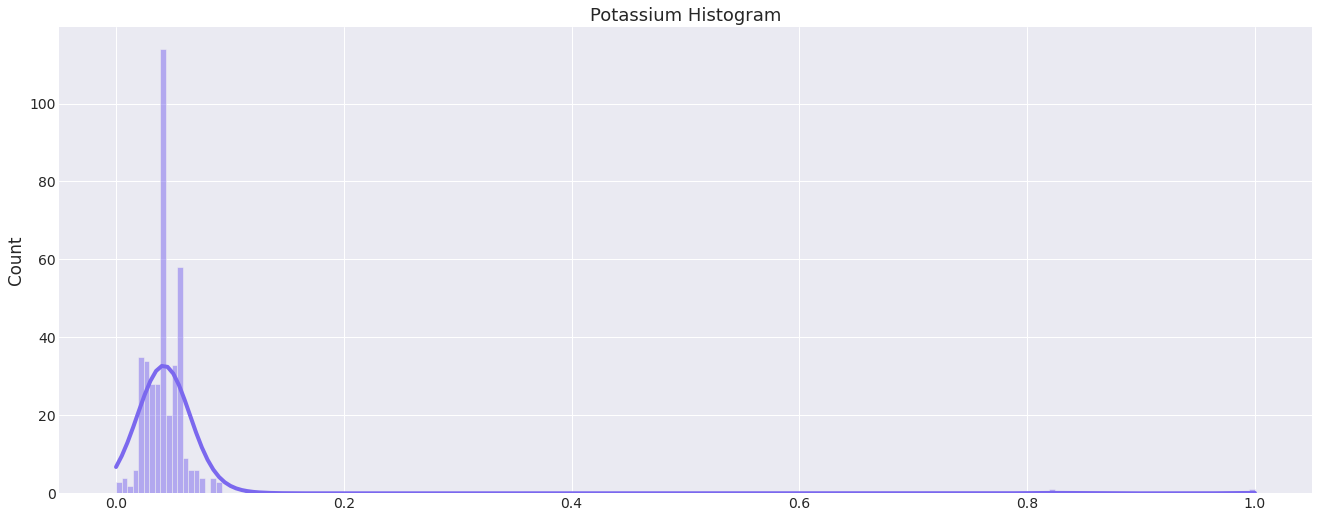

In [228]:
plt.figure(figsize=(20,8))
sns.histplot(data=mm_scaled_data, x="Potassium (mEq/L)", kde=True, color="mediumslateblue")
plt.title("Potassium Histogram", fontsize=18)
plt.xlabel(None)
plt.show()

Because of the outliers, almost all values are between 0 and 0.1, instead of 0 and 1.

So how do we deal with this?  
Well you can get rid of outliers, or you can just use another scaling method.

In [229]:
scaler = StandardScaler()
arr = scaler.fit_transform(mydata)
standardized_data = pd.DataFrame(arr, columns=mydata.columns)
standardized_data

,Age (yrs),Blood Pressure (mm/Hg),Specific Gravity,Albumin,Sugar,Blood Glucose Random (mgs/dL),Blood Urea (mgs/dL),Serum Creatinine (mgs/dL),Sodium (mEq/L),Potassium (mEq/L),...,Hypertension_yes,Diabetes Mellitus_yes,Coronary Artery Disease_yes,Appetite_poor,Pedal Edema_yes,Anemia_yes,Chronic Kidney Disease_notckd,Blood_Type_AB,Blood_Type_B,Blood_Type_O
0,-0.205464,0.254214,0.421486,0.076249,-0.380269,-0.320122,-0.419451,-0.319668,0.040104,-0.062903,...,1.311903,1.385535,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-0.565802,-0.592749,1.665408
1,-2.623810,-1.972476,0.421486,2.363728,-0.380269,-0.320122,-0.784315,-0.390819,0.040104,-0.062903,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-0.565802,-0.592749,-0.600453
2,0.620313,0.254214,-1.421074,0.838742,2.507853,3.697618,-0.074858,-0.212942,0.040104,-0.062903,...,-0.762252,1.385535,-0.304789,1.969276,-0.484322,2.380476,-0.774597,-0.565802,1.687055,-0.600453
3,-0.205464,-0.488016,-2.342354,2.363728,-0.380269,-0.373337,-0.014047,0.142813,-2.896333,-0.737181,...,1.311903,-0.721743,-0.304789,1.969276,2.064742,2.380476,-0.774597,-0.565802,-0.592749,1.665408
4,-0.028511,0.254214,-1.421074,0.838742,-0.380269,-0.519679,-0.622154,-0.284093,0.040104,-0.062903,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,-0.774597,-0.565802,-0.592749,-0.600453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.207425,0.254214,0.421486,-0.686244,-0.380269,-0.067350,-0.155939,-0.444182,1.345187,0.114539,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,-0.565802,-0.592749,1.665408
396,-0.559368,-0.488016,1.342766,-0.686244,-0.380269,-0.932096,-0.520803,-0.319668,0.366375,-0.382298,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,1.767402,-0.592749,-0.600453
397,-2.328890,0.254214,0.421486,-0.686244,-0.380269,-0.599501,-0.622154,-0.426395,-0.068653,-0.062903,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,-0.565802,1.687055,-0.600453
398,-2.033969,-1.230246,1.342766,-0.686244,-0.380269,-0.413248,-0.135669,-0.355244,-0.286167,0.114539,...,-0.762252,-0.721743,-0.304789,-0.507801,-0.484322,-0.420084,1.290994,-0.565802,1.687055,-0.600453


As you can see, values are centered around 0 and they don't get that far from it.